In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from sklearn import datasets

# Problem 1

In this problem we will look at image compression using SVD, following the lines of the well-known "Eigenfaces" experiment. The basic concept is to represent an image (in grayscale) of size $m \times n$ as an $m \times n$ real matrix $M$. SVD is then applied to this matrix to obtain $U$, $S$, and $V$ such that $M = U S V^T$. Here $U$ and $V$ are the matrices whose columns are the left and right singular vectors respectively, and $S$ is a diagonal $m \times n$ matrix consisting of the singular values of $M$. The number of non-zero singular values is the rank of $M$. By using just the largest $k$ singular values (and corresponding left and right singular vectors), one obtains the best rank-$k$ approximation to $M$.

The following code returns the dataset of 400 images.

In [2]:
data = datasets.fetch_olivetti_faces()
images = data.images
print(images.shape)
print(images.dtype)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 64, 64)
float32


(a) Given an $m \times n$ image $M$ and its rank-$k$ approximation $A$, we can measure the reconstruction error using mean $\ell_1$ error: $$ \text{error}_{\ell_1}(M, A) = \frac{1}{mn}\| M - A \|_1 = \frac{1}{mn}\sum_{i=1}^{m}\sum_{j=1}^{n}| M_{i,j} - A_{i,j} |. $$ For $k = 1, \dots, 30$, take the average rank-$k$ reconstruction error over all images in the dataset, and plot a curve of average reconstruction error as a function of $k$.

Loaded Olivetti faces dataset with 400 images of shape 64x64


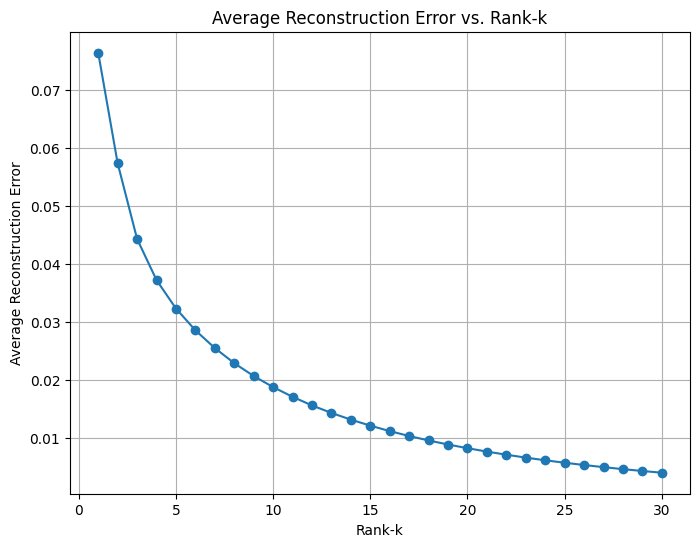

In [4]:
# Function to compute rank-k approximation using SVD
def svd_reconstruct(M, k):
  U, S, Vt = np.linalg.svd(M, full_matrices=False)
  S_k = np.diag(S[:k])
  U_k = U[:, :k]
  Vt_k = Vt[:k, :]
  return U_k @ S_k @ Vt_k

def svd_image_compression():
  # Load Olivetti faces dataset
  faces = data
  images = faces.images
  n_samples, h, w = images.shape
  print(f'Loaded Olivetti faces dataset with {n_samples} images of shape {h}x{w}')

  # Flatten the images into a matrix of shape (n_samples, h*w)
  flat_images = images.reshape((n_samples, h * w))

  ks = range(1, 31)
  errors = []
  for k in ks:
    total_error = 0
    for img in flat_images:
      img = img.reshape(h, w)
      approx_img = svd_reconstruct(img, k)
      error = np.abs(img - approx_img).mean()
      total_error += error
    avg_error = total_error / n_samples
    errors.append(avg_error)

  # Plotting the reconstruction error vs. rank-k
  plt.figure(figsize=(8, 6))
  plt.plot(ks, errors, marker='o')
  plt.title('Average Reconstruction Error vs. Rank-k')
  plt.xlabel('Rank-k')
  plt.ylabel('Average Reconstruction Error')
  plt.grid(True)
  plt.show()

svd_image_compression()

(b) Pick any image in the dataset, and display the following side-by-side as images: the original, and the best rank-$k$ approximations for $k = 10, 20, 30, 40$. You will find the `imshow` method in matplotlib useful for this; pass in `cmap='gray'` to render in grayscale. Feel free to play around further.

Loaded Olivetti faces dataset with 400 images of shape 64x64


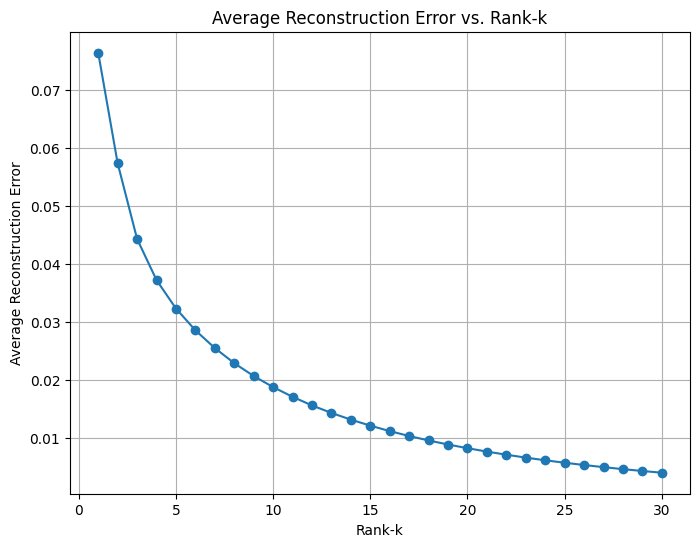

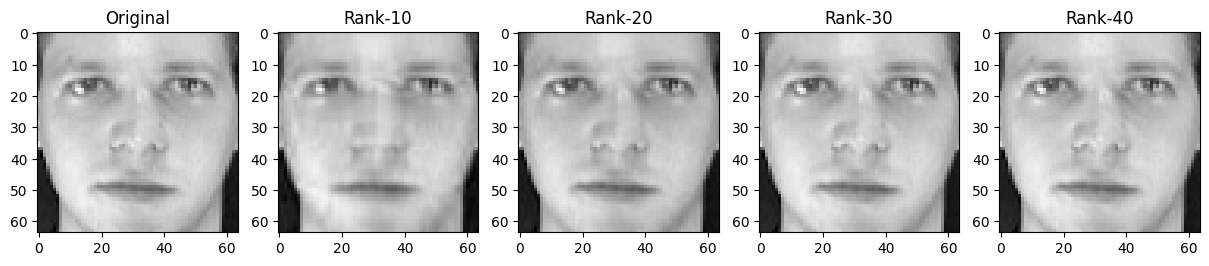

In [5]:
def display_rank_approximations():
  faces = data
  images = faces.images
  n_samples, h, w = images.shape
  flat_images = images.reshape((n_samples, h * w))

  img_index = 0  # Select the first image to demonstrate
  original_img = flat_images[img_index].reshape(h, w)
  ranks = [10, 20, 30, 40]

  fig, axes = plt.subplots(1, len(ranks) + 1, figsize=(15, 5))
  axes[0].imshow(original_img, cmap='gray')
  axes[0].set_title('Original')

  for i, k in enumerate(ranks):
    approx_img = svd_reconstruct(original_img, k)
    axes[i + 1].imshow(approx_img, cmap='gray')
    axes[i + 1].set_title(f'Rank-{k}')

  plt.show()

svd_image_compression()
display_rank_approximations()

## Task 2: PCA on Breast Cancer Dataset

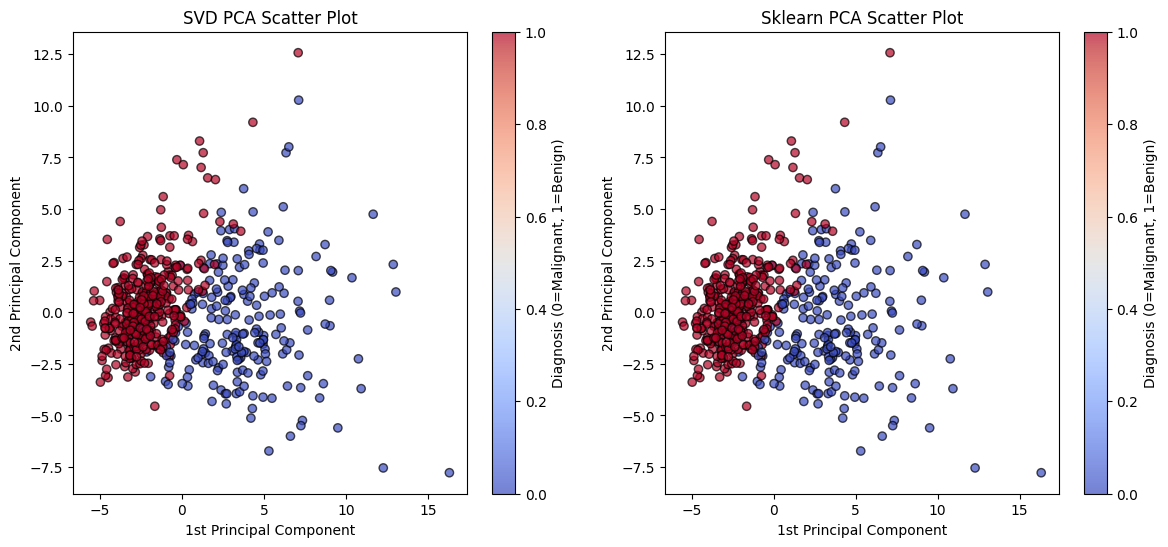

In [7]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# Load the Wisconsin breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Part (a): PCA using SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

# Part (b): PCA using sklearn.decomposition.PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# SVD scatter plot
scatter1 = ax1.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
ax1.set_title('SVD PCA Scatter Plot')
ax1.set_xlabel('1st Principal Component')
ax1.set_ylabel('2nd Principal Component')

# PCA scatter plot
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
ax2.set_title('Sklearn PCA Scatter Plot')
ax2.set_xlabel('1st Principal Component')
ax2.set_ylabel('2nd Principal Component')

fig.colorbar(scatter1, ax=ax1, label='Diagnosis (0=Malignant, 1=Benign)')
fig.colorbar(scatter2, ax=ax2, label='Diagnosis (0=Malignant, 1=Benign)')

plt.show()
